In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df['Churn'].head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.shape

(7043, 21)

In [10]:
# Check for duplicates
duplicates=df.duplicated()

In [11]:
df[duplicates]
# No duplicates

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [12]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [13]:
# More customers are not retained

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

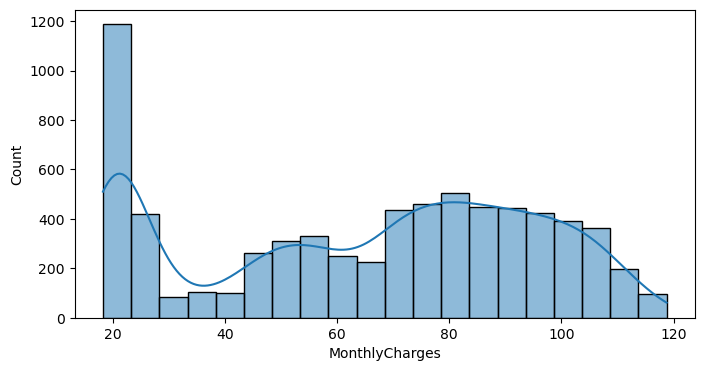

In [14]:
plt.figure(figsize=(8,4))

sns.histplot(df["MonthlyCharges"],bins=20,kde=True)


In [15]:
# Check the gender paying more monthly charges
monthly_charges_by_gender = df.groupby('gender')['MonthlyCharges'].mean()
gender_paying_more = monthly_charges_by_gender.idxmax()

In [16]:
gender_paying_more

'Female'

In [17]:
# Check the churn rate depending on gender
churn_rates_by_gender = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack()


In [18]:
churn_rates_by_gender

Churn,No,Yes
gender,,
Female,0.730791,0.269209
Male,0.738397,0.261603


In [19]:
# More female customers leave as compare to male

In [20]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
# Calculate churn rates for customers with and without partners
churn_rates_by_partner = df.groupby('Partner')['Churn'].value_counts(normalize=True).unstack()
churn_rates_by_partner

Churn,No,Yes
Partner,,
No,0.670420,0.329580
Yes,0.803351,0.196649


In [23]:
# High churn rates for customers without partners

In [24]:
# Calculate churn rates for customers with and without dependents
churn_rates_by_dependents = df.groupby('Dependents')['Churn'].value_counts(normalize=True).unstack()
churn_rates_by_dependents

Churn,No,Yes
Dependents,,
No,0.687209,0.312791
Yes,0.845498,0.154502


In [25]:
# With no dependents have a high churn rate

In [26]:
# Calculate churn rates for customers with and without dependents
churn_rates_by_internet = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()

In [27]:
churn_rates_by_internet

Churn,No,Yes
InternetService,,
DSL,0.810409,0.189591
Fiber optic,0.581072,0.418928
No,0.925950,0.074050


In [28]:
df=df.drop('customerID',axis=1)
df['Dependents'].fillna('Unknown', inplace=True)

In [29]:
# Gender,dependents,intenetservice have an effect on churn rates
df = pd.get_dummies(df, columns=['InternetService'], prefix='InternetService')
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})




In [30]:
# Fibre optic has high churn rates compared to dsl and no internet service
df['InternetService_DSL']=df['InternetService_DSL'].astype(int)
df['InternetService_Fiber optic']=df['InternetService_Fiber optic'].astype(int)
df['InternetService_No']=df['InternetService_No'].astype(int)


In [31]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,Yes,0,1,No,No phone service,No,Yes,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0
1,0,0,No,0,34,Yes,No,Yes,No,Yes,...,No,One year,No,Mailed check,56.95,1889.5,No,1,0,0
2,0,0,No,0,2,Yes,No,Yes,Yes,No,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0,0
3,0,0,No,0,45,No,No phone service,Yes,No,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0
4,1,0,No,0,2,Yes,No,No,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,1,0


In [32]:
df['Partner'].fillna('Unknown', inplace=True)
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})


In [33]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,1,0,1,No,No phone service,No,Yes,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0
1,0,0,0,0,34,Yes,No,Yes,No,Yes,...,No,One year,No,Mailed check,56.95,1889.5,No,1,0,0
2,0,0,0,0,2,Yes,No,Yes,Yes,No,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0,0
3,0,0,0,0,45,No,No phone service,Yes,No,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0
4,1,0,0,0,2,Yes,No,No,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,1,0


In [34]:
# df['TotalCharges'].fillna(0, inplace=True)


In [35]:
df['TotalCharges'].isnull().sum()

0

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No'],
      dtype='object')

In [40]:
X=df[['Dependents','gender','MonthlyCharges','Partner','InternetService_DSL','InternetService_Fiber optic','InternetService_No']]

In [41]:
X.head()

,Dependents,gender,MonthlyCharges,Partner,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,1,29.85,1,1,0,0
1,0,0,56.95,0,1,0,0
2,0,0,53.85,0,1,0,0
3,0,0,42.30,0,1,0,0
4,0,1,70.70,0,0,1,0


In [42]:
y=df['Churn']

In [43]:
 X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [44]:
X_train.shape

(4718, 7)

In [45]:
y_train.shape

(4718,)

In [46]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [47]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [48]:
pred=rf_model.predict(X_test)

In [49]:
pred

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [50]:
print(confusion_matrix(pred,y_test))

[[1361  367]
 [ 336  261]]


In [51]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

          No       0.80      0.79      0.79      1728
         Yes       0.42      0.44      0.43       597

    accuracy                           0.70      2325
   macro avg       0.61      0.61      0.61      2325
weighted avg       0.70      0.70      0.70      2325



In [52]:
print(accuracy_score(pred,y_test))

0.6976344086021505


In [ ]:
# Score improved from 0.670 to 0.698